In [1]:
# Basic imports
import numpy as np
import pandas as pd
# Data visualizations
import matplotlib.pyplot as plt
import seaborn as sns
# Pre-Processing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# Metrics
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [2]:
df = pd.read_csv("data\kc_house_data.csv")

In [3]:
# Dataframe Cleaning

# Duplicate id
df.drop(index=df.index[4846], axis=0, inplace=True)
# Dropping NAs
df = df.dropna(subset=["heat_source", "sewer_system"], axis=0)

In [4]:
# Dataframe Cleaning

# Dropping price outliers
mask = df['price'] > 1300000
df.drop(df[mask].index, axis=0, inplace=True)

# Getting zipcode from address
df['zipcode'] = df['address'].str.extract(r'(\d{5})').astype(int)

# Changing the column type from obj to int and getting rid of the extra words
df['grade'] = df['grade'].str.split().str[0]
df['grade'] = df['grade'].astype(int)

# Use boolean indexing to get all the addresses that contain "Washington"
df = df[df['address'].str.contains("Washington")]

# Reset the index
df = df.reset_index(drop=True)

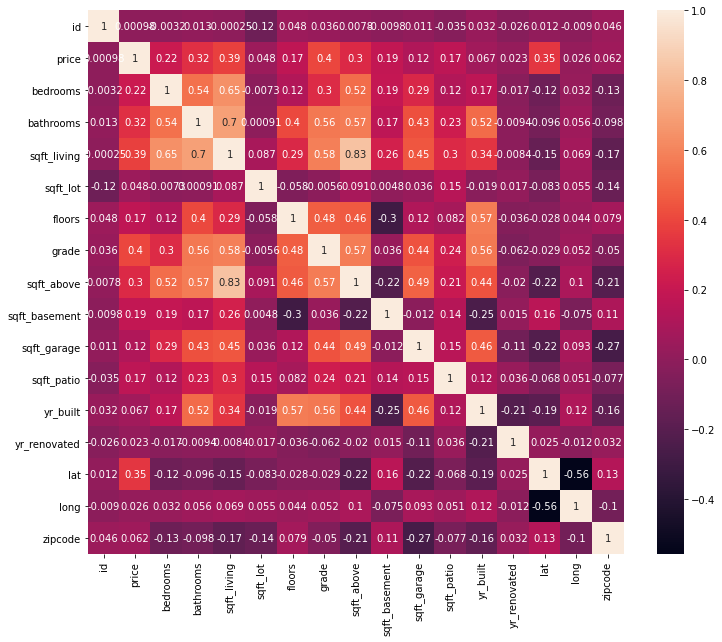

In [5]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True)
plt.show()

<AxesSubplot:xlabel='yr_built'>

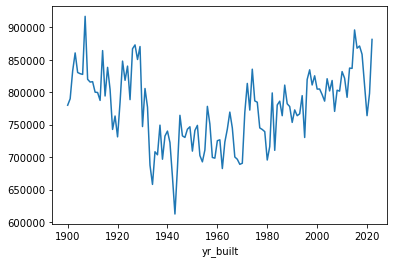

In [6]:
df.groupby('yr_built').mean()['price'].plot()

<AxesSubplot:xlabel='bathrooms'>

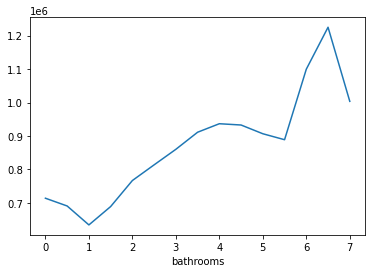

In [7]:
df.groupby('bathrooms').mean()['price'].plot()

In [8]:
import datetime
current_year = datetime.datetime.now().year
df['age'] = current_year - df['yr_built']

In [9]:
df['renovated'] = df['yr_renovated'].apply(lambda x: 1 if x != 0 else 0)

In [10]:
view_mapping = {
    "NONE": 0,
    "FAIR": 1,
    "AVERAGE": 2,
    "GOOD": 3,
    "EXCELLENT": 4
}

df["view_num"] = df["view"].map(view_mapping)

In [11]:
df["has_basement"] = df["sqft_basement"].apply(lambda x: 1 if x > 0 else 0)

In [12]:
df["has_waterfront"] = df["waterfront"].apply(lambda x: 1 if x == "YES" else 0)

In [13]:
# Convert 'YES' to 1 and 'NO' to 0 in the 'nuisance' column
df['has_nuisance'] = df['nuisance'].apply(lambda x: 1 if x == 'YES' else 0)

In [14]:
condition_mapping = {
    "Poor": 0,
    "Fair": 1,
    "Average": 2,
    "Good": 3,
    "Very Good": 4
}

df["condition"] = df["condition"].map(condition_mapping)

In [15]:
cols_to_drop = df.select_dtypes(include=['object']).columns
X = df.drop(columns=cols_to_drop)
X = X.drop("price", axis=1)
y = df["price"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

scaler = StandardScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled,
                              columns=X_train.columns,
                              index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled,
                             columns=X_test.columns,
                             index=X_test.index)

In [16]:
from sklearn.linear_model import LinearRegression

# Initialize the linear regression model
model_sk = LinearRegression()

# Fit the model on the training data
model_sk.fit(X_train_scaled, y_train)

# Predict on the training data
train_preds = model_sk.predict(X_train_scaled)

# Calculate the R^2 score on the training data
r2_score(y_train, train_preds)

0.457114856502029

In [17]:
dict(zip(X_train.columns, model_sk.coef_))

{'id': -2371.003363299022,
 'bedrooms': 916.4538622962843,
 'bathrooms': 20287.07522490542,
 'sqft_living': 39072.27528728727,
 'sqft_lot': 13925.234773962055,
 'floors': 279.490682999254,
 'condition': 23805.380530066363,
 'grade': 63278.24305303686,
 'sqft_above': 35540.186169882094,
 'sqft_basement': -7603.415818555979,
 'sqft_garage': 3994.592315318547,
 'sqft_patio': 6118.242286233863,
 'yr_built': -14407.947025930525,
 'yr_renovated': 863939.3788789379,
 'lat': 155339.90051300803,
 'long': 98883.83563813659,
 'zipcode': 23311.400871126796,
 'age': 14407.947025933649,
 'renovated': -862883.1009951967,
 'view_num': 16460.41237289891,
 'has_basement': 16836.392276920567,
 'has_waterfront': 1695.5008308544764,
 'has_nuisance': -9363.519151090903}

In [18]:
mean_absolute_error(y_train, train_preds)

131908.0481515803

In [19]:
mean_squared_error(y_train, train_preds)

34270630796.78942

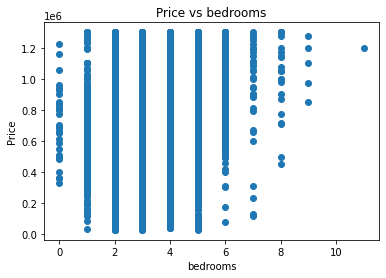

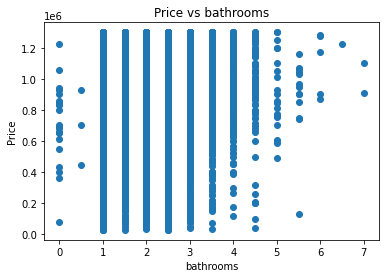

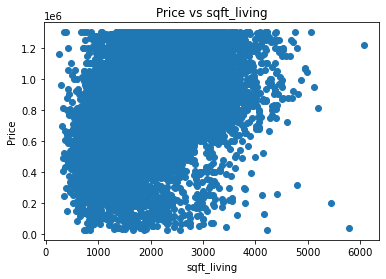

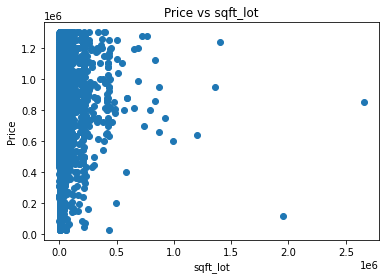

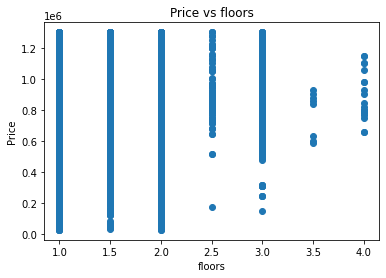

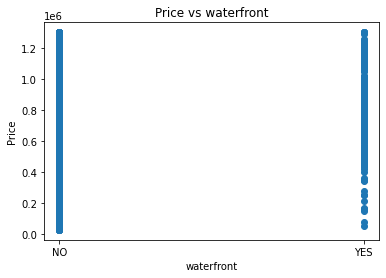

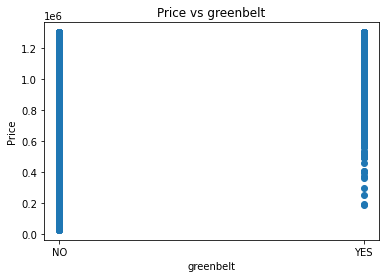

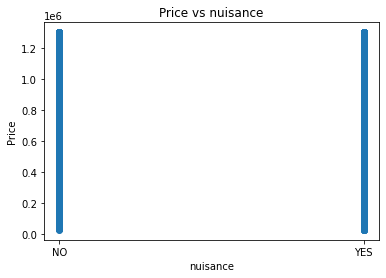

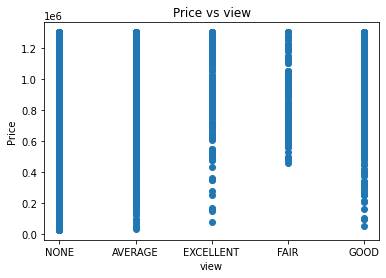

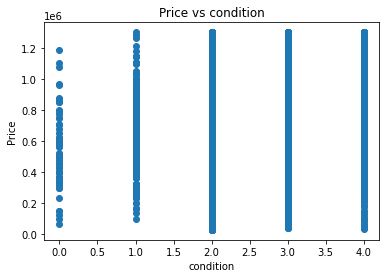

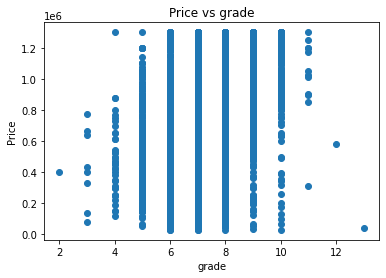

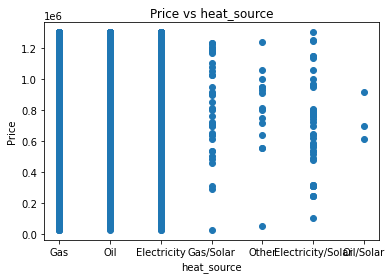

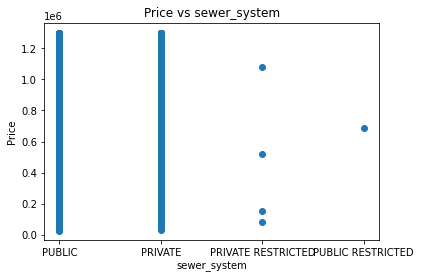

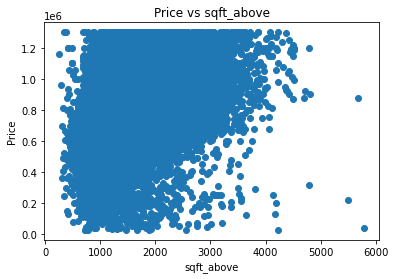

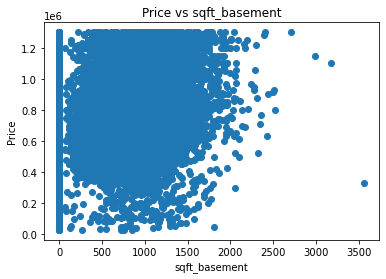

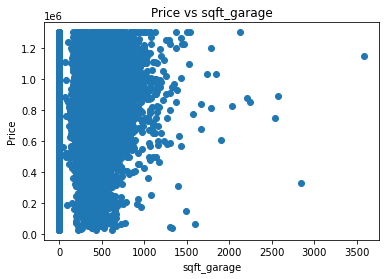

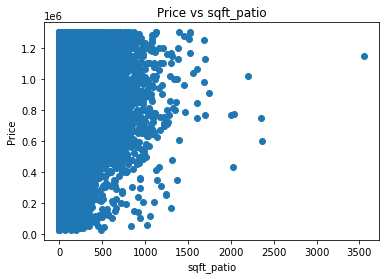

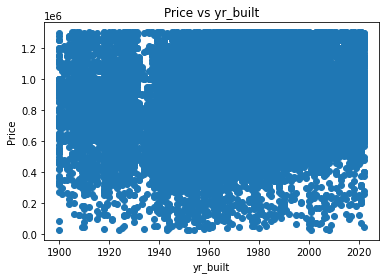

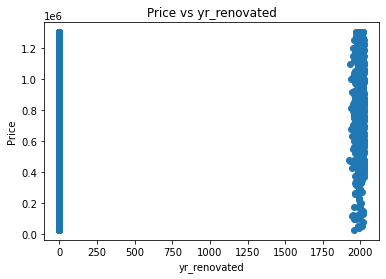

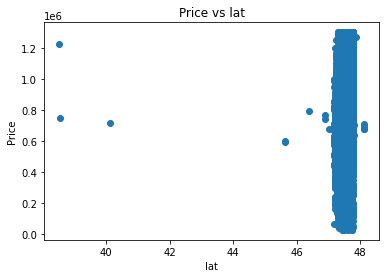

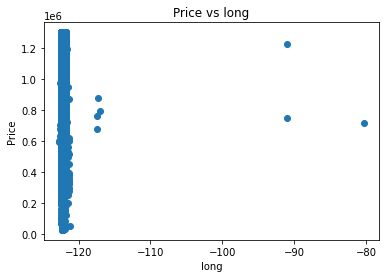

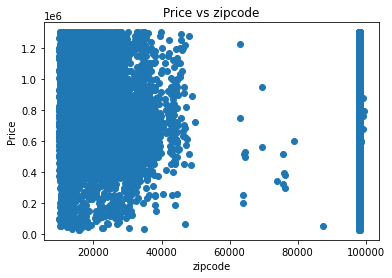

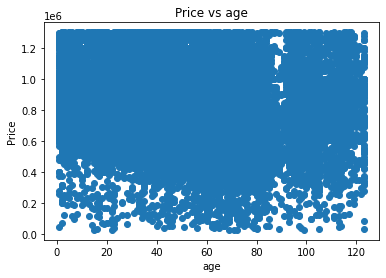

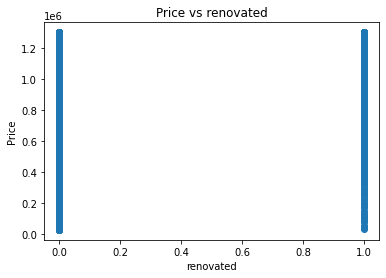

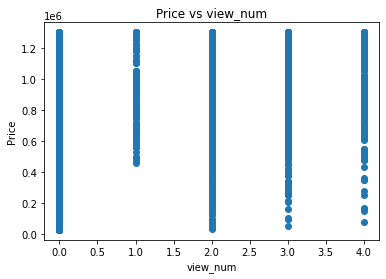

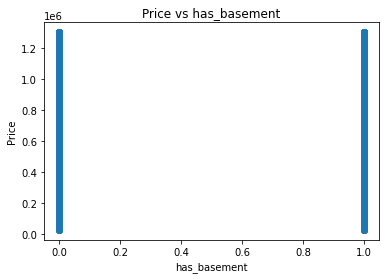

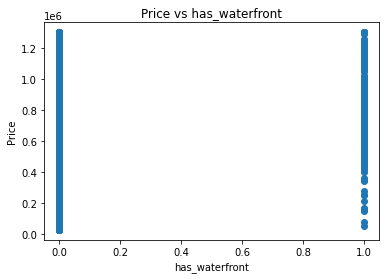

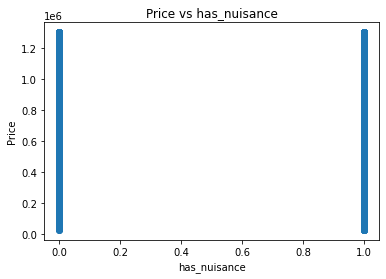

In [20]:
import matplotlib.pyplot as plt

# get list of column names
columns = list(df.columns)

# remove columns that are not independent variables
exclude = ['id', 'date', 'price', 'address']
columns = [col for col in columns if col not in exclude]

# loop over columns and create scatter plot with price
for col in columns:
    plt.scatter(df[col], df['price'])
    plt.title(f'Price vs {col}')
    plt.xlabel(col)
    plt.ylabel('Price')
    plt.show()

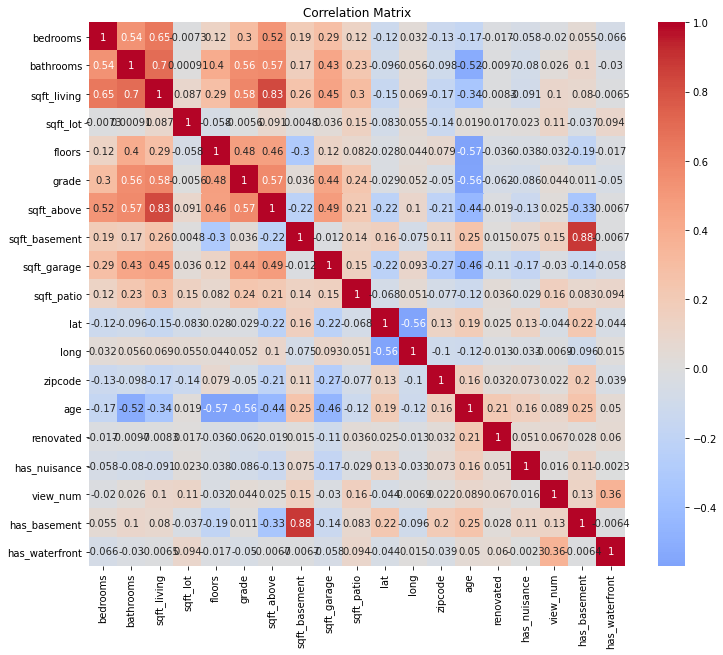

In [21]:
# get a subset of the dataframe with only the independent variables
columns = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
           'grade', 'sqft_above', 'sqft_basement', 'sqft_garage', 'sqft_patio',
           'lat', 'long', 'zipcode', 'age', 'renovated', 'has_nuisance',
           'view_num', 'has_basement', 'has_waterfront']
X = df[columns]

# create correlation matrix
corr_matrix = X.corr()

# plot correlation matrix as a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

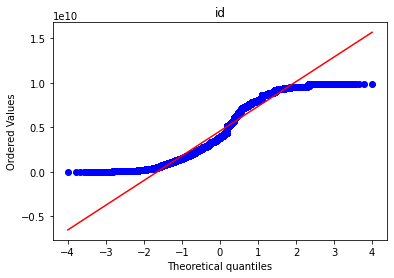

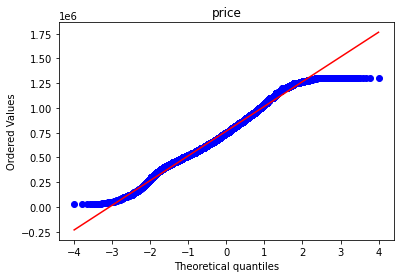

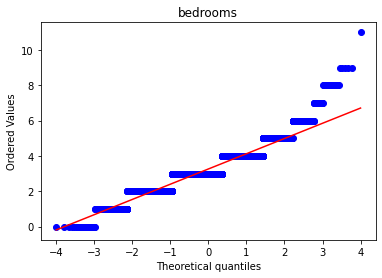

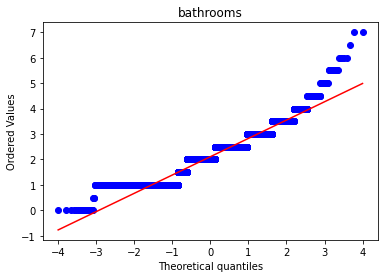

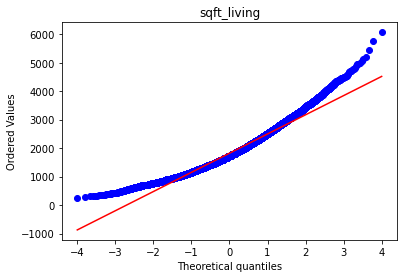

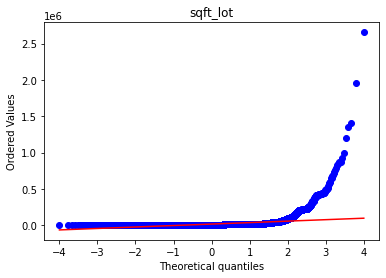

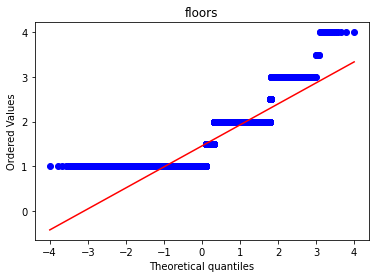

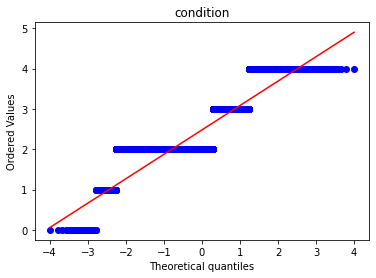

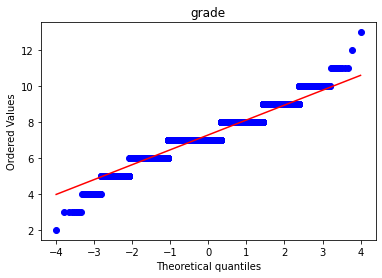

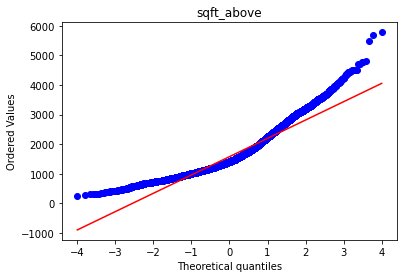

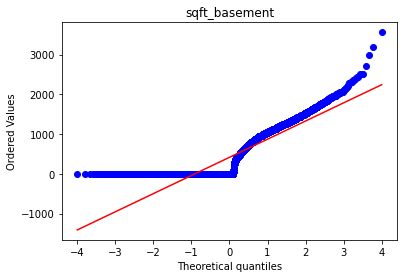

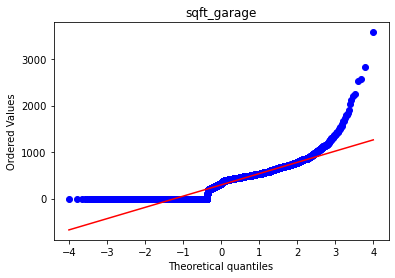

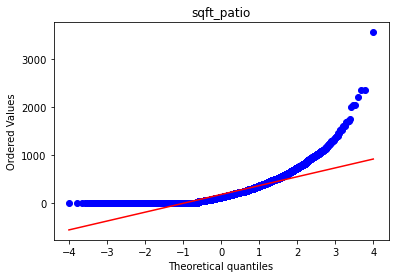

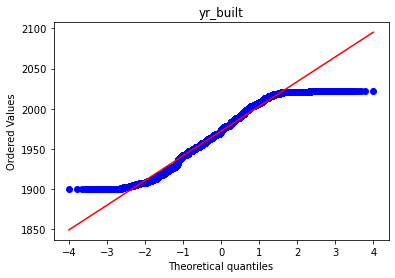

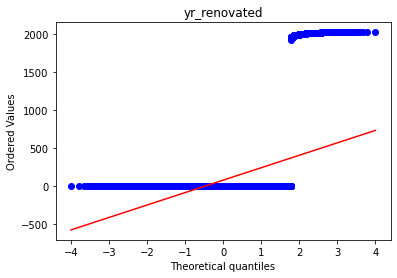

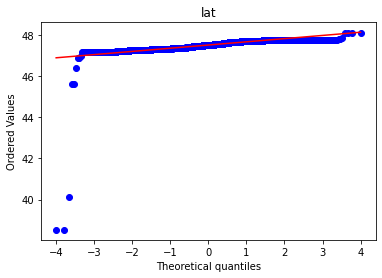

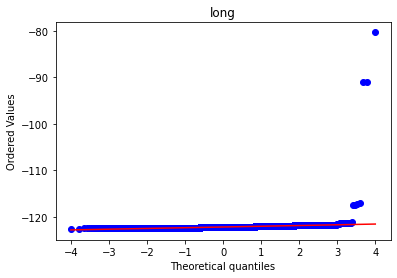

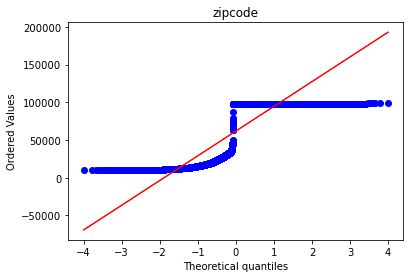

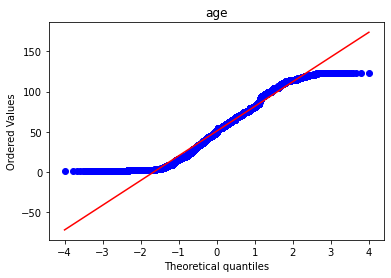

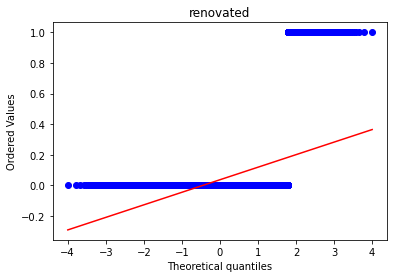

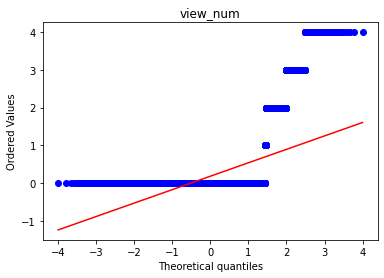

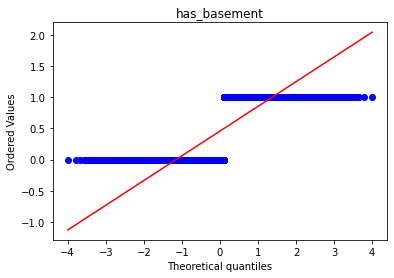

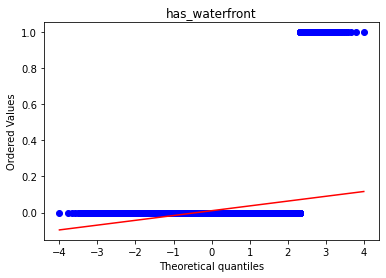

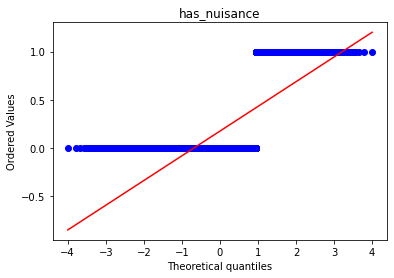

In [23]:
from scipy import stats

numerical_columns = df.select_dtypes(include=['int64', 'float64', 'int32']).columns

# create a normal probability plot for each numerical column
for column in numerical_columns:
    fig, ax = plt.subplots()
    stats.probplot(df[column], plot=ax)
    ax.set_title(column)
    plt.show()

In [24]:
def remove_outliers(df, cols):
    """
    Remove outliers from a DataFrame for specified columns using the interquartile range (IQR) method.

    Args:
        df (pandas.DataFrame): DataFrame to remove outliers from.
        cols (list): List of column names to remove outliers from.

    Returns:
        pandas.DataFrame: DataFrame with outliers removed for specified columns.
    """
    df_out = df.copy()
    for col in cols:
        q1 = df_out[col].quantile(0.25)
        q3 = df_out[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        df_out = df_out[(df_out[col] >= lower_bound) & (df_out[col] <= upper_bound)]
    return df_out

In [25]:
cols_to_filter = ['sqft_living', 'sqft_patio', 'sqft_garage', 'sqft_basement', 'sqft_lot']
filtered_df = remove_outliers(df, cols_to_filter)

print('Original shape:', df.shape)
print('Filtered shape:', filtered_df.shape)

Original shape: (21802, 32)
Filtered shape: (18833, 32)


In [26]:
filtered_df['total_sqft'] = filtered_df['sqft_living'] + filtered_df['sqft_lot'] + filtered_df['sqft_above'] + filtered_df['sqft_basement'] + filtered_df['sqft_garage'] + filtered_df['sqft_patio']

In [27]:
cols_to_drop = ['waterfront', 'greenbelt', 'nuisance', "view", 'date', 'heat_source', 'sewer_system', 'address', "id"]
filtered_df = filtered_df.drop(columns=cols_to_drop)

In [28]:
filtered_df["price_by_total_sqft"] = filtered_df['price']/filtered_df['total_sqft']

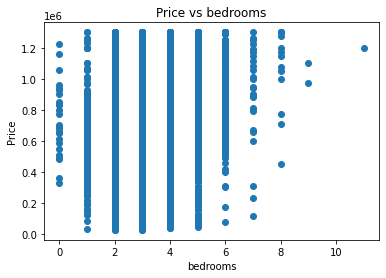

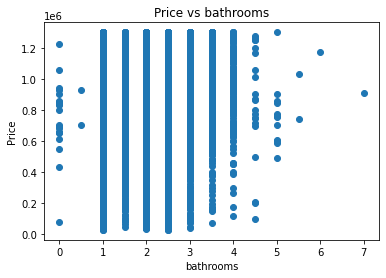

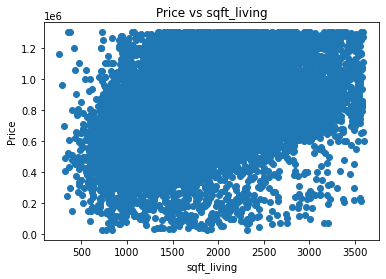

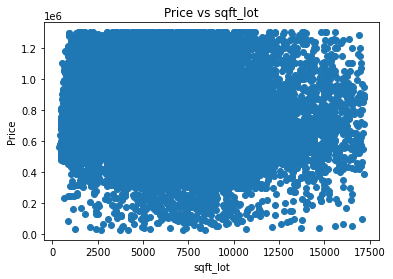

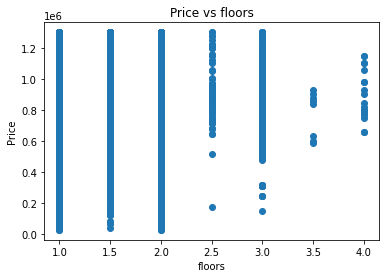

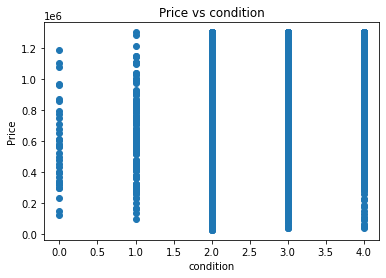

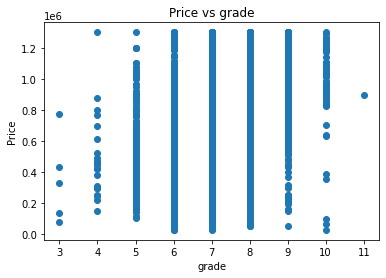

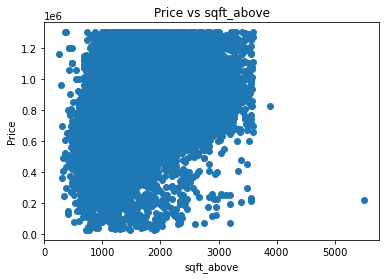

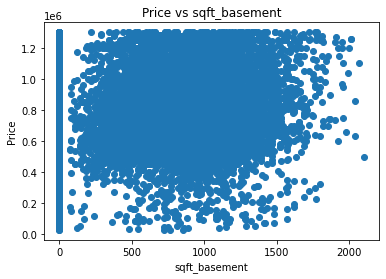

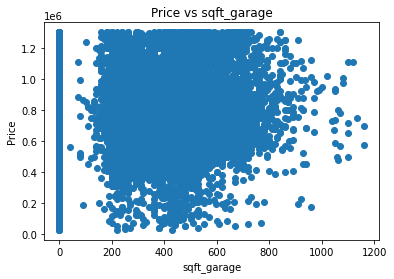

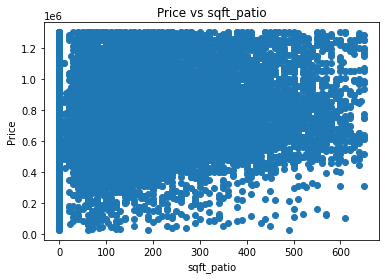

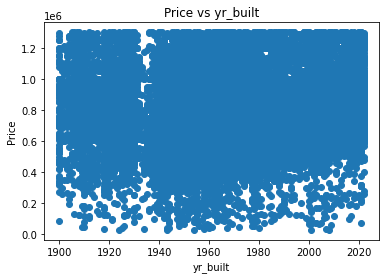

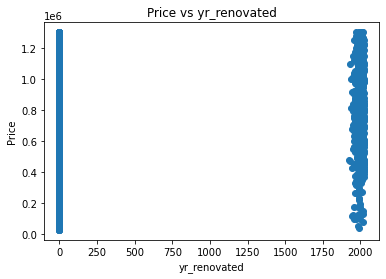

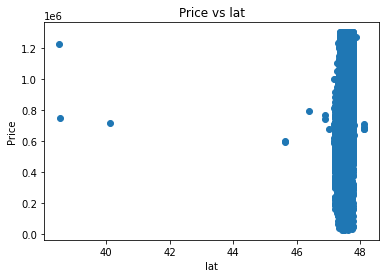

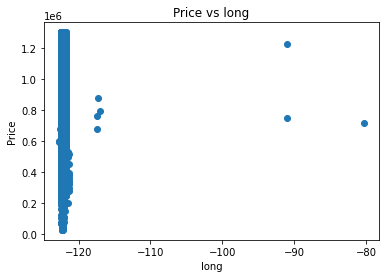

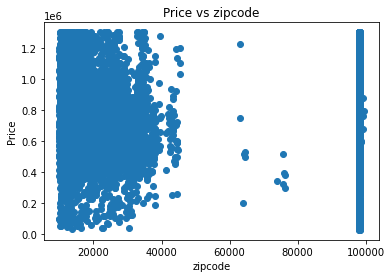

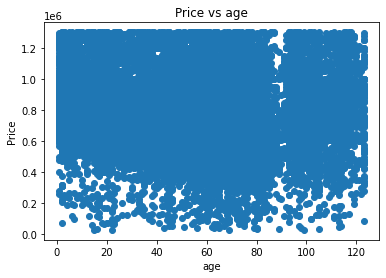

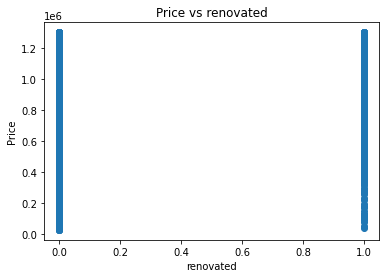

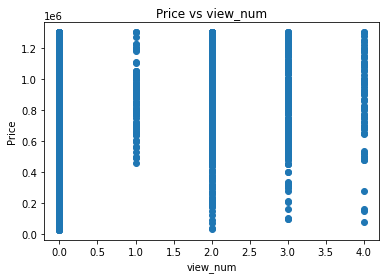

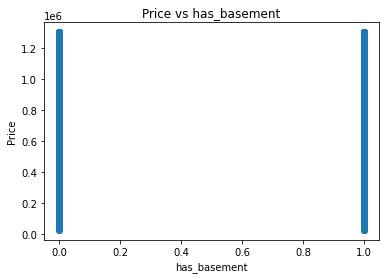

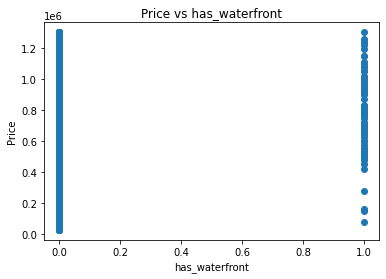

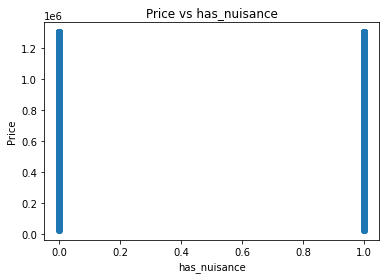

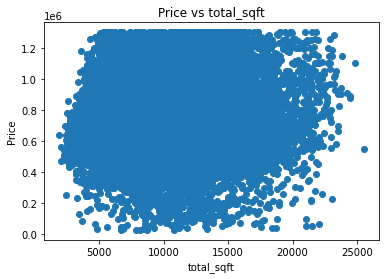

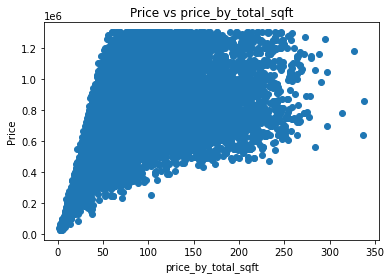

In [29]:
# get list of column names
columns = list(filtered_df.columns)

# remove columns that are not independent variables
exclude = ['id', 'date', 'price', 'address']
columns = [col for col in columns if col not in exclude]

# loop over columns and create scatter plot with price
for col in columns:
    plt.scatter(filtered_df[col], filtered_df['price'])
    plt.title(f'Price vs {col}')
    plt.xlabel(col)
    plt.ylabel('Price')
    plt.show()

In [30]:
filtered_df.corr()["price"].sort_values(ascending=False)

price                  1.000000
price_by_total_sqft    0.501404
grade                  0.391005
lat                    0.373519
sqft_living            0.369729
bathrooms              0.302902
sqft_above             0.266479
bedrooms               0.203496
sqft_basement          0.200566
has_basement           0.191604
floors                 0.172466
sqft_patio             0.151218
view_num               0.103521
zipcode                0.096061
sqft_garage            0.078852
total_sqft             0.042089
yr_built               0.040963
yr_renovated           0.025685
renovated              0.025556
long                   0.015105
has_nuisance           0.005397
has_waterfront         0.003937
condition             -0.003529
age                   -0.040963
sqft_lot              -0.109485
Name: price, dtype: float64

In [31]:
# Split your data into features (X) and target (y)
# X = filtered_df.drop(columns=cols_to_drop)
X = filtered_df.drop("price", axis=1)
y = filtered_df["price"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

scaler = StandardScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled,
                              columns=X_train.columns,
                              index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled,
                             columns=X_test.columns,
                             index=X_test.index)

In [32]:
len(X_test)

6215

In [33]:
len(X_train)

12618

In [34]:
from sklearn.linear_model import LinearRegression

# Initialize the linear regression model
model_sk = LinearRegression()

# Fit the model on the training data
model_sk.fit(X_train_scaled, y_train)

# Predict on the training data
train_preds = model_sk.predict(X_train_scaled)

# Calculate the R^2 score on the training data
r2_score(y_train, train_preds)

0.7675915682251371

In [35]:
dict(zip(X_train.columns, model_sk.coef_))

{'bedrooms': 8423.016133750529,
 'bathrooms': 6815.022058243214,
 'sqft_living': 41763.059924475485,
 'sqft_lot': 46939.936938245155,
 'floors': -66340.71065472084,
 'condition': 12548.947447501998,
 'grade': -395.1764576797923,
 'sqft_above': 87224.62507101845,
 'sqft_basement': 21412.582647745785,
 'sqft_garage': 32569.98035270947,
 'sqft_patio': 3422.864872373438,
 'yr_built': -22455.337695584913,
 'yr_renovated': 497325.57347856986,
 'lat': 74514.8089541139,
 'long': 48676.89132230802,
 'zipcode': 514.1160732933405,
 'age': 22455.337695583716,
 'renovated': -497889.2263530537,
 'view_num': 9199.434263844341,
 'has_basement': -20678.972945789166,
 'has_waterfront': 2341.2474388045243,
 'has_nuisance': -6132.560292950467,
 'total_sqft': 66156.10120287343,
 'price_by_total_sqft': 263675.5525644488}

In [36]:
mean_absolute_error(y_train, train_preds)

87281.21403700105

In [37]:
np.sqrt(mean_squared_error(y_train, train_preds))

119117.30481639698

In [38]:
model_sk = LinearRegression()
model_sk.fit(X_train_scaled, y_train)
train_preds = model_sk.predict(X_test_scaled)

In [39]:
r2_score(y_test, train_preds)

0.7610683728111106

In [40]:
mean_absolute_error(y_test, train_preds)

88921.70295594315

In [41]:
gis = pd.read_csv("data\kc_info.csv")
gis["type"].unique()

array(['Abandoned', 'Access_Point', 'Airport', 'Campground',
       'Commercial_Farm', 'Lodging', 'Gate_w/o_Building',
       'Gated_w/_Building', 'Cemetery', 'Government', 'Educational',
       'Cultural', 'Police', 'Fire', 'Public_Gathering', 'Seasonal_Home',
       'Utility'], dtype=object)

In [42]:
from scipy.spatial.distance import cdist

# define a list of relevant types
relevant_types = ['Airport', 
                  'Campground', 
                  'Commercial_Farm',
                  'Gate_w/o_Building',
                  'Gated_w/_Building',
                  'Lodging', 'Cemetery', 
                  'Government', 'Educational',
                  'Cultural', 'Police', 'Fire',
                  'Public_Gathering', 'Utility', 
                  'Seasonal_Home'
                 ]

# create an empty dataframe to hold the new columns
new_cols_df = pd.DataFrame()

# loop through each relevant type and apply the code
for type_name in relevant_types:
    type_df = gis[gis['type'] == type_name]
    coords_to_compare = type_df[['lat', 'lon']].values
    distances = cdist(filtered_df[['lat', 'long']].values, coords_to_compare, 'euclidean')
    closest_type_distance = distances.min(axis=1)
    # create a new column for the price by distance to type
    new_cols_df[f'price_by_dist_to_{type_name.lower()}'] = filtered_df['price'] / closest_type_distance

# concatenate the filtered_df with the new_cols_df
filtered_df = pd.concat([filtered_df, new_cols_df], axis=1)

In [43]:
filtered_df.corr()["price"].sort_values(ascending=False)

price                                 1.000000
price_by_total_sqft                   0.501404
grade                                 0.391005
lat                                   0.373519
price_by_dist_to_educational          0.371309
sqft_living                           0.369729
price_by_dist_to_campground           0.314091
price_by_dist_to_public_gathering     0.307990
bathrooms                             0.302902
price_by_dist_to_airport              0.292072
sqft_above                            0.266479
price_by_dist_to_government           0.239703
price_by_dist_to_utility              0.234830
price_by_dist_to_lodging              0.229956
price_by_dist_to_commercial_farm      0.228100
price_by_dist_to_fire                 0.209502
price_by_dist_to_cultural             0.205551
bedrooms                              0.203496
sqft_basement                         0.200566
price_by_dist_to_cemetery             0.199979
has_basement                          0.191604
price_by_dist

In [44]:
crime = pd.read_csv("data\kc_crime.csv")

In [45]:
# Create the list of towns and cities
towns_and_cities = ['Algona',
                    'Auburn',
                    'Beaux Arts Village', 
                    'Bellevue', 'Black Diamond', 
                    'Bothell', 'Burien', 'Carnation', 
                    'Clyde Hill', 'Covington', 
                    'Des Moines', 'Duvall', 
                    'Enumclaw', 
                    'Federal Way',
                    'Hunts Point', 
                    'Issaquah', 
                    'Kenmore', 
                    'Kent', 
                    'Kirkland',
                    'Lake Forest Park',
                    'Maple Valley',
                    'Medina',
                    'Mercer Island',
                    'Milton',
                    'Newcastle', 
                    'Normandy Park',
                    'North Bend', 
                    'Pacific',
                    'Redmond', 
                    'Renton', 
                    'Sammamish',
                    'SeaTac', 
                    'Seattle',
                    'Shoreline',
                    'Skykomish', 
                    'Snoqualmie',
                    'Tukwila', 
                    'Woodinville',
                    'Yarrow Point']

crime["city"] = crime["city"].str.title()

crime["city"] = crime["city"].apply(lambda x: next((town for town in towns_and_cities if town in x), None))

In [46]:
crime = crime.dropna()

In [47]:
crime_by_zip = crime.groupby('zip')["incident_type"].count().reset_index()

In [48]:
crime_by_zip = crime_by_zip.rename(columns={"incident_type": "crime_count"})

In [49]:
filtered_df['zipcode'] = filtered_df['zipcode'].astype(str)
merged_df = filtered_df.merge(crime_by_zip, left_on='zipcode', right_on='zip')

In [50]:
merged_df = merged_df.drop('zip', axis=1)
merged_df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,...,price_by_dist_to_cemetery,price_by_dist_to_government,price_by_dist_to_educational,price_by_dist_to_cultural,price_by_dist_to_police,price_by_dist_to_fire,price_by_dist_to_public_gathering,price_by_dist_to_utility,price_by_dist_to_seasonal_home,crime_count
0,675000.0,4,1.0,1180,7140,1.0,3,7,1180,0,...,3.170479e+07,1.454311e+08,1.069685e+08,2.428995e+07,6.285010e+06,3.942471e+07,1.649307e+08,2.618958e+08,2.073958e+06,19
1,750000.0,3,2.0,1830,7969,1.0,2,7,930,930,...,5.628752e+07,5.115390e+07,8.535952e+07,4.872679e+07,8.909421e+06,7.949767e+07,1.246193e+08,1.584746e+08,2.190957e+06,19
2,728000.0,4,2.0,2170,7520,1.0,2,7,1240,1240,...,3.784925e+07,2.265922e+08,1.040249e+08,2.485687e+07,6.782516e+06,3.787329e+07,2.767709e+08,2.159398e+08,2.248997e+06,19
3,565000.0,4,2.0,1400,10364,1.5,3,6,1400,0,...,1.789921e+07,3.414839e+07,5.578906e+07,1.152965e+08,5.928294e+06,3.351241e+07,5.076006e+07,7.057280e+07,1.608932e+06,19
4,645000.0,3,2.0,1520,8250,1.0,2,8,1190,590,...,2.911891e+07,1.565287e+08,1.545685e+08,2.215084e+07,5.889327e+06,3.847535e+07,1.116639e+08,4.015683e+08,1.986959e+06,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10801,360000.0,3,1.0,1370,3920,1.5,2,7,1370,0,...,6.552288e+05,1.020780e+08,8.546300e+05,1.312230e+08,9.887865e+07,1.118063e+08,1.029433e+08,5.921510e+07,8.847159e+06,8
10802,275000.0,3,1.0,930,7804,1.5,3,6,930,740,...,4.992115e+05,1.341036e+08,6.505873e+05,2.166411e+08,1.267883e+08,1.503951e+08,1.353544e+08,5.998412e+07,7.008807e+06,8
10803,328000.0,2,1.5,980,5000,2.0,2,7,980,0,...,5.911909e+05,1.505728e+08,7.704280e+05,1.151389e+08,1.146421e+08,1.470648e+08,1.105175e+08,1.585404e+08,9.281550e+06,8
10804,640000.0,4,3.5,2422,6557,2.0,2,8,2422,0,...,5.884884e+06,1.552265e+07,2.174808e+07,2.112092e+07,1.200129e+07,1.781205e+07,2.188558e+07,2.260243e+07,2.887887e+06,237


In [51]:
merged_df['price_by_crime'] = merged_df['price'] / merged_df['crime_count']

In [52]:
merged_df.drop('crime_count', axis=1, inplace=True)

In [53]:
# correlation = merged_df.corr()["price"]
# columns_to_drop = correlation[abs(correlation) < 0.20].index
# merged_df = merged_df.drop(columns_to_drop, axis=1)

In [54]:
merged_df.corr()["price"].sort_values(ascending=False)

price                                 1.000000
price_by_total_sqft                   0.488439
lat                                   0.480022
grade                                 0.393707
price_by_dist_to_seasonal_home        0.374090
sqft_living                           0.372780
price_by_dist_to_educational          0.362810
price_by_dist_to_public_gathering     0.291792
price_by_dist_to_campground           0.290094
bathrooms                             0.289055
price_by_crime                        0.289029
price_by_dist_to_airport              0.281977
sqft_above                            0.258440
price_by_dist_to_gated_w/_building    0.246145
sqft_basement                         0.238743
has_basement                          0.228399
price_by_dist_to_government           0.223707
price_by_dist_to_fire                 0.222623
price_by_dist_to_utility              0.219833
price_by_dist_to_lodging              0.215209
bedrooms                              0.204701
price_by_dist

In [55]:
X = merged_df.drop("price", axis=1)
y = merged_df["price"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

# scaler = StandardScaler()

# scaler.fit(X_train)

# X_train_scaled = scaler.transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# X_train_scaled = pd.DataFrame(X_train_scaled,
#                               columns=X_train.columns,
#                               index=X_train.index)
# X_test_scaled = pd.DataFrame(X_test_scaled,
#                              columns=X_test.columns,
#                              index=X_test.index)

In [56]:
from sklearn.linear_model import LinearRegression

# Initialize the linear regression model
model_sk = LinearRegression()

# Fit the model on the training data
model_sk.fit(X_train, y_train)

# Predict on the training data
train_preds = model_sk.predict(X_train)
test_preds = model_sk.predict(X_test)

# Calculate the R^2 score on the training data
print('Training R^2 score:', r2_score(y_train, train_preds))
print('Test R^2 score:', r2_score(y_test, test_preds))

Training R^2 score: 0.8181825096446201
Test R^2 score: 0.8038341439268858


In [91]:
# Log-transform the target variable
y_log = np.log(y)

# Split the log-transformed data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_log, test_size=0.33, random_state=42)

# Initialize the linear regression model
model_sk = LinearRegression()

# Fit the model on the training data
model_sk.fit(X_train, y_train)

# Predict on the training data
train_preds = model_sk.predict(X_train)
test_preds = model_sk.predict(X_test)

# Convert the predicted log values back to their original scale
#train_preds = np.exp(train_preds)
#test_preds = np.exp(test_preds)

# Convert the true log values back to their original scale
#y_train = np.exp(y_train)
#y_test = np.exp(y_test)

# Calculate the R^2 score on the training data and test data
print('Training R^2 score:', r2_score(y_train, train_preds))
print('Test R^2 score:', r2_score(y_test, test_preds))

Training R^2 score: 0.6993362640514103
Test R^2 score: 0.7112231131218079


In [89]:
len(train_preds)

7240

In [58]:
merged_df = merged_df.drop(["sqft_garage", 
                            "total_sqft", 
                            "age",
                            "has_nuisance",
                            "condition", 
                            "yr_renovated",
                            "renovated", 
                            "yr_built",
                            "long",
                            "has_waterfront"], axis=1)

In [59]:
merged_df.corr()["price"].sort_values(ascending=False)

price                                 1.000000
price_by_total_sqft                   0.488439
lat                                   0.480022
grade                                 0.393707
price_by_dist_to_seasonal_home        0.374090
sqft_living                           0.372780
price_by_dist_to_educational          0.362810
price_by_dist_to_public_gathering     0.291792
price_by_dist_to_campground           0.290094
bathrooms                             0.289055
price_by_crime                        0.289029
price_by_dist_to_airport              0.281977
sqft_above                            0.258440
price_by_dist_to_gated_w/_building    0.246145
sqft_basement                         0.238743
has_basement                          0.228399
price_by_dist_to_government           0.223707
price_by_dist_to_fire                 0.222623
price_by_dist_to_utility              0.219833
price_by_dist_to_lodging              0.215209
bedrooms                              0.204701
price_by_dist

In [60]:
X = merged_df.drop("price", axis=1)
y = merged_df["price"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [61]:
# Log-transform the target variable
y_log = np.log(y)

# Split the log-transformed data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_log, test_size=0.33, random_state=42)

# Initialize the linear regression model
model_sk = LinearRegression()

# Fit the model on the training data
model_sk.fit(X_train, y_train)

# Predict on the training data
train_preds = model_sk.predict(X_train)
test_preds = model_sk.predict(X_test)

# Convert the predicted log values back to their original scale
train_preds = np.exp(train_preds)
test_preds = np.exp(test_preds)

# Convert the true log values back to their original scale
y_train = np.exp(y_train)
y_test = np.exp(y_test)

# Calculate the R^2 score on the training data and test data
print('Training R^2 score:', r2_score(y_train, train_preds))
print('Test R^2 score:', r2_score(y_test, test_preds))

Training R^2 score: 0.6703577260660981
Test R^2 score: 0.6728313160964134


In [62]:
# Mean absolute error on training data
print("Mean absolute error on training data: ", mean_absolute_error(y_train, train_preds))

# Root mean squared error on training data
print("Root mean squared error on training data: ", np.sqrt(mean_squared_error(y_train, train_preds)))

Mean absolute error on training data:  101005.00016170631
Root mean squared error on training data:  146956.92832873034


In [63]:
# Mean absolute error on test data
print("Mean absolute error on test data: ", mean_absolute_error(y_test, test_preds))

# Root mean squared error on test data
print("Root mean squared error on test data: ", np.sqrt(mean_squared_error(y_test, test_preds)))

Mean absolute error on test data:  100093.37255375723
Root mean squared error on test data:  144498.092531989


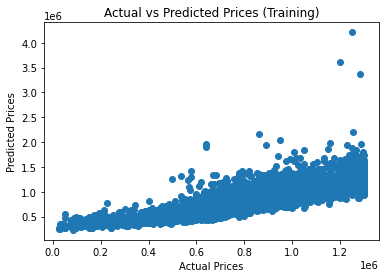

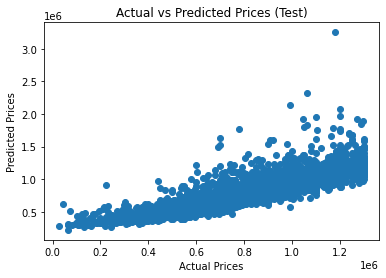

In [70]:
# Create scatter plot of actual vs predicted values for training data
plt.scatter(y_train, train_preds)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices (Training)')
plt.show()

# Create scatter plot of actual vs predicted values for test data
plt.scatter(y_test, test_preds)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices (Test)')
plt.show()

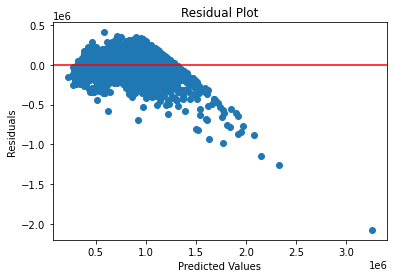

In [71]:
residuals = y_test - test_preds

plt.scatter(test_preds, residuals)
plt.axhline(y=0, color='r', linestyle='-')
plt.title("Residual Plot")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()

In [75]:
from scipy.stats import shapiro

# Test for normality of the residuals using the Shapiro-Wilk test
stat, p = shapiro(residuals)
alpha = 0.05

if p > alpha:
    print('Residuals are likely Gaussian (fail to reject H0)')
else:
    print('Residuals are not Gaussian (reject H0)')

Residuals are not Gaussian (reject H0)


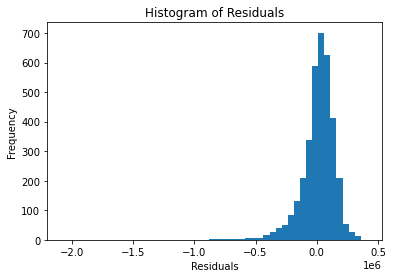

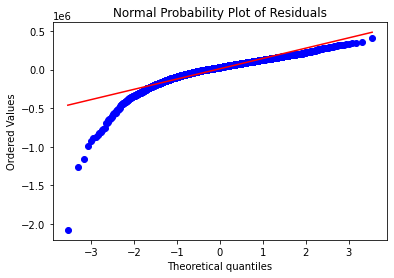

In [76]:
test_residuals = y_test - test_preds

# Create a histogram of the residuals
plt.hist(test_residuals, bins=50)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Create a normal probability plot of the residuals

stats.probplot(test_residuals, dist="norm", plot=plt)
plt.title('Normal Probability Plot of Residuals')
plt.show()